In [179]:
#import libraries
import sys
from os.path import dirname, join as pjoin
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.linalg as la
np.set_printoptions(threshold=1000)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [159]:
#load usps data into arr
usps_data_dir= "usps_all.mat"
usps_data = sio.loadmat(usps_data_dir)
arr = usps_data['fea']
labels = usps_data['gnd']
arr.shape

(9298, 256)

In [160]:
# Split-out dataset into training and validation
X = arr[:,0:255]
y = labels[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=2007, random_state=1)

In [161]:
#train the test data using decision tree
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2,max_features=16)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, max_features=16)

In [162]:
#Predicting labels on the test set for the decison tree
y_pred =  clf.predict(X_validation)

In [170]:
#Evaluate Predictions using Accuracy Score and Confusion Matrix
print('Accuracy Score on the Test Data: ',accuracy_score(Y_validation, y_pred))
print('Confusion Matrix: \n', confusion_matrix(Y_validation, y_pred))

Accuracy Score on the Test Data:  0.36073741903338313
Confusion Matrix: 
 [[336   0   0   0   0   0   1   0   0   1]
 [  4 222   0   0   0   0   3   0   0  46]
 [186   1   0   0   0   0  15   0   0   0]
 [174   0   0   0   0   0   0   0   0  17]
 [ 47   0   0   0   0   0   0   0   0 124]
 [147   0   0   0   0   0   8   0   0  13]
 [148   0   0   0   0   0   6   0   0   2]
 [ 11   1   0   0   0   0   0   0   0 171]
 [ 98   1   0   0   0   0   6   0   0  51]
 [  3   4   0   0   0   0   0   0   0 160]]


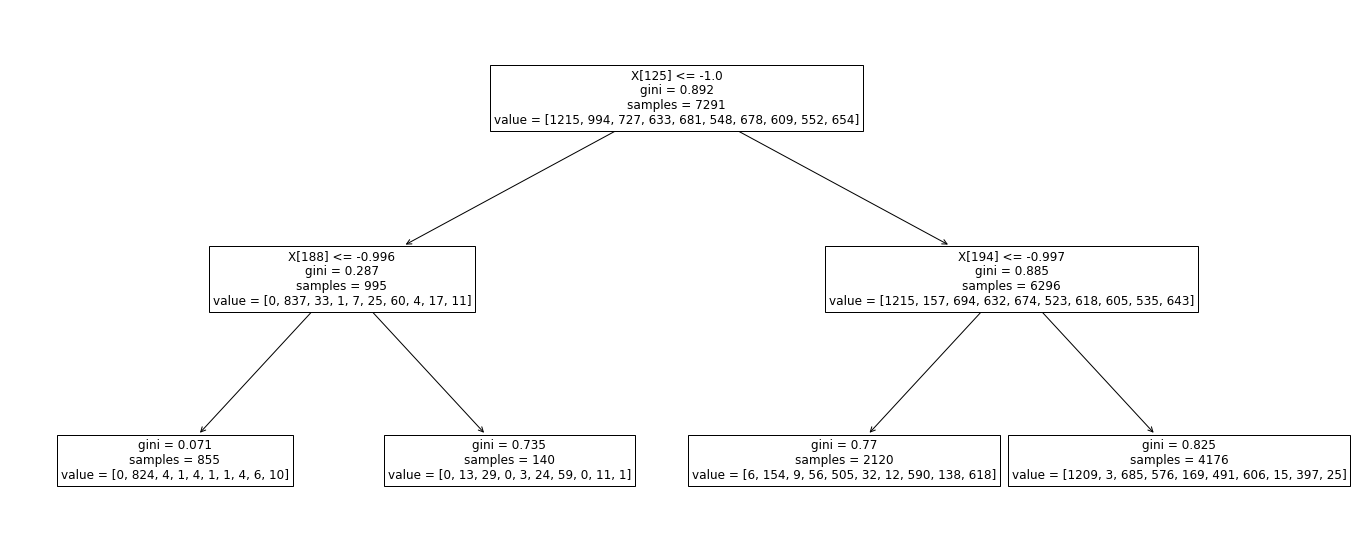

In [215]:
#showing the tree structure
plt.figure(figsize=(24,10))
tree.plot_tree(clf, fontsize=12)
plt.show()

In [164]:
#Text representation of the tree to show the entire tree structure
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_125 <= -1.00
|   |--- feature_188 <= -1.00
|   |   |--- class: 2
|   |--- feature_188 >  -1.00
|   |   |--- class: 7
|--- feature_125 >  -1.00
|   |--- feature_194 <= -1.00
|   |   |--- class: 10
|   |--- feature_194 >  -1.00
|   |   |--- class: 1



In [172]:
#Train the test data using K-nearest neighbor
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [173]:
#Predicting labels on the test set.
y_pred =  neigh.predict(X_validation)

In [175]:
#Evaluate Predictions using Accuracy Score and Confusion Matrix
print('Accuracy Score on the Test Data: ',accuracy_score(Y_validation, y_pred))
print('Confusion Matrix: \n', confusion_matrix(Y_validation, y_pred))

Accuracy Score on the Test Data:  0.9745889387144993
Confusion Matrix: 
 [[335   0   0   2   0   0   0   0   0   1]
 [  0 273   0   0   1   0   1   0   0   0]
 [  2   0 198   0   0   0   1   1   0   0]
 [  0   0   1 183   0   5   0   0   1   1]
 [  1   0   1   0 160   0   1   1   0   7]
 [  2   0   1   0   0 162   0   0   2   1]
 [  1   0   1   0   0   0 154   0   0   0]
 [  0   2   0   0   1   0   0 177   1   2]
 [  0   1   1   2   0   2   0   1 148   1]
 [  0   0   0   0   1   0   0   0   0 166]]


In [176]:
#Train the test data using Support Vector Machine
clm = SVC()
clm.fit(X, y)

SVC()

In [177]:
#Predicting labels on the test set.
y_pred =  clm.predict(X_validation)

In [182]:
#Evaluate Predictions using Accuracy Score and Confusion Matrix 
print('Accuracy Score on the Test Data: ',accuracy_score(Y_validation, y_pred))
print('Confusion Matrix: \n', confusion_matrix(Y_validation, y_pred))

Accuracy Score on the Test Data:  0.987045341305431
Confusion Matrix: 
 [[335   0   1   1   0   0   0   0   1   0]
 [  0 272   0   0   1   0   2   0   0   0]
 [  0   0 202   0   0   0   0   0   0   0]
 [  0   0   1 184   0   3   0   0   3   0]
 [  0   0   0   0 169   0   1   0   0   1]
 [  0   0   0   0   1 166   0   0   1   0]
 [  0   0   1   0   0   0 155   0   0   0]
 [  0   0   0   0   1   0   0 180   0   2]
 [  0   1   0   1   0   1   0   1 152   0]
 [  0   0   0   0   0   0   0   1   0 166]]
